# Data Engineering with AWS (pt 1)
>[Course GitHub link](https://github.com/LinkedInLearning/data-engineering-AWS-1-3010976) *sections separated by branches*

## Creating Dynamodb Tables in AWS Command Line `CloudShell`

### Configure CLI
```
aws configure
aws configure list
```

### Create Table 
```
aws dynamodb\
    create-table\
        --table-name PetInventory \
        --attribute-definitions \
            AttributeName = pet_species, AttributeType = S \
            AttributeName = pet_id, AttributeType = N
        --key-schema \
            AttributeName = pet_species, KeyType = HASH
            AttributeName = pet_species, KeyType = RANGE
        --billing-mode PAY_PER_REQUEST
```

### Describe Table
```
aws dynamodb\
    describe-table \
    --table-name PetInventory
```

### List Tables
```
aws dynamodb\
    list-tables
```

### Delete Table
```
aws dynamodb\
    delete-table \
    --table-name PetInventory
```

## Creating Dynamodb Tables with Python Script
>Python SDK > `boto 3`

In [1]:
# import python sdk library > boto3
import boto3

In [6]:
def create_movie_table(table_name):
    '''
    args: 
    - table_name -> str
    '''
    # creating dynamodb instance using boto3 client
    dynamodb = boto3.client('dynamodb')
    
    # creating table in dynamodb
    table = dynamodb.create_table(
        TableName = table_name,
        KeySchema = [
            # creating attributes
            {
                'AttributeName': 'year',
                'KeyType': 'HASH' # partition key
            },
            {
                'AttributeName': 'title',
                'KeyType': 'RANGE' # sort key
            }
        ],
        # defining attributes
        AttributeDefinitions = [
            {
                'AttributeName': 'year',
                'AttributeType': 'N'
            },
            {
                'AttributeName': 'title',
                'AttributeType': 'S'
            }
        ],
        # defining read/write capacity for table
        ProvisionedThroughput = {
            'ReadCapacityUnits': 10,
            'WriteCapacityUnits': 10
        }
    )
    
    return table

In [33]:
# # create table
# table_name = 'Movies'
# create_movie_table(table_name = table_name)

In [8]:
# table status
dynamodb = boto3.resource('dynamodb')
table = dynamodb.Table(table_name)

print("Table Status: ", table.table_status)

Table Status:  ACTIVE


## Inserting Data

In [9]:
# importing libraries
from decimal import Decimal # precision rounding
import json # parsing json files
import boto3

In [27]:
# testing out loop that will be used in function for json data
with open('02_05_data.json') as json_file:
    for item in json.load(json_file, parse_float = Decimal):
        print(item)
        print()
        print(item.keys())
        print()
        print(item['info'].keys())
        print()

{'year': 2013, 'title': 'Rush', 'info': {'directors': ['Ron Howard'], 'release_date': '2013-09-02T00:00:00Z', 'rating': Decimal('8.3'), 'genres': ['Action', 'Biography', 'Drama', 'Sport'], 'image_url': 'http://ia.media-imdb.com/images/M/MV5BMTQyMDE0MTY0OV5BMl5BanBnXkFtZTcwMjI2OTI0OQ@@._V1_SX400_.jpg', 'plot': 'A re-creation of the merciless 1970s rivalry between Formula One rivals James Hunt and Niki Lauda.', 'rank': 2, 'running_time_secs': 7380, 'actors': ['Daniel Bruhl', 'Chris Hemsworth', 'Olivia Wilde']}}

dict_keys(['year', 'title', 'info'])

dict_keys(['directors', 'release_date', 'rating', 'genres', 'image_url', 'plot', 'rank', 'running_time_secs', 'actors'])

{'year': 2013, 'title': 'Prisoners', 'info': {'directors': ['Denis Villeneuve'], 'release_date': '2013-08-30T00:00:00Z', 'rating': Decimal('8.2'), 'genres': ['Crime', 'Drama', 'Thriller'], 'image_url': 'http://ia.media-imdb.com/images/M/MV5BMTg0NTIzMjQ1NV5BMl5BanBnXkFtZTcwNDc3MzM5OQ@@._V1_SX400_.jpg', 'plot': "When Keller 

dict_keys(['year', 'title', 'info'])

dict_keys(['directors', 'release_date', 'rating', 'genres', 'image_url', 'plot', 'rank', 'running_time_secs', 'actors'])

{'year': 2005, 'title': 'War of the Worlds', 'info': {'directors': ['Steven Spielberg'], 'release_date': '2005-06-13T00:00:00Z', 'rating': Decimal('6.5'), 'genres': ['Adventure', 'Sci-Fi', 'Thriller'], 'image_url': 'http://ia.media-imdb.com/images/M/MV5BNDUyODAzNDI1Nl5BMl5BanBnXkFtZTcwMDA2NDAzMw@@._V1_SX400_.jpg', 'plot': 'As Earth is invaded by alien tripod fighting machines, one family fights for survival.', 'rank': 448, 'running_time_secs': 6960, 'actors': ['Tom Cruise', 'Dakota Fanning', 'Tim Robbins']}}

dict_keys(['year', 'title', 'info'])

dict_keys(['directors', 'release_date', 'rating', 'genres', 'image_url', 'plot', 'rank', 'running_time_secs', 'actors'])

{'year': 2001, 'title': 'A Beautiful Mind', 'info': {'directors': ['Ron Howard'], 'release_date': '2001-12-13T00:00:00Z', 'rating': Decimal('8.1'), 'genres': ['Biogr


dict_keys(['directors', 'release_date', 'rating', 'genres', 'image_url', 'rank', 'running_time_secs', 'actors'])

{'year': 2008, 'title': 'Jumper', 'info': {'directors': ['Doug Liman'], 'release_date': '2008-02-06T00:00:00Z', 'rating': Decimal('5.9'), 'genres': ['Action', 'Adventure', 'Sci-Fi', 'Thriller'], 'image_url': 'http://ia.media-imdb.com/images/M/MV5BMjEwOTkyOTI3M15BMl5BanBnXkFtZTcwNTQxMjU1MQ@@._V1_SX400_.jpg', 'plot': 'A teenager with teleportation abilities must suddenly finds himself in the middle of an ancient war between those like him and their sworn annihilators.', 'rank': 800, 'running_time_secs': 5280, 'actors': ['Hayden Christensen', 'Samuel L. Jackson', 'Jamie Bell']}}

dict_keys(['year', 'title', 'info'])

dict_keys(['directors', 'release_date', 'rating', 'genres', 'image_url', 'plot', 'rank', 'running_time_secs', 'actors'])

{'year': 2011, 'title': 'Priest', 'info': {'directors': ['Scott Stewart'], 'release_date': '2011-04-26T00:00:00Z', 'rating': Decimal('5.6'), 

dict_keys(['directors', 'release_date', 'rating', 'genres', 'image_url', 'plot', 'rank', 'running_time_secs', 'actors'])

{'year': 2002, 'title': 'About a Boy', 'info': {'directors': ['Chris Weitz', 'Paul Weitz'], 'release_date': '2002-04-26T00:00:00Z', 'rating': Decimal('7.1'), 'genres': ['Comedy', 'Drama', 'Romance'], 'image_url': 'http://ia.media-imdb.com/images/M/MV5BMTM5NDY1NDg1Ml5BMl5BanBnXkFtZTcwODg5OTIyMQ@@._V1_SX400_.jpg', 'plot': "Based on Nick Hornby's best-selling novel, About A Boy is the story of a cynical, immature young man who is taught how to act like a grown-up by a little boy", 'rank': 1158, 'running_time_secs': 6060, 'actors': ['Hugh Grant', 'Nicholas Hoult', 'Toni Collette']}}

dict_keys(['year', 'title', 'info'])

dict_keys(['directors', 'release_date', 'rating', 'genres', 'image_url', 'plot', 'rank', 'running_time_secs', 'actors'])

{'year': 2006, 'title': 'Happy Feet', 'info': {'directors': ['George Miller', 'Warren Coleman', 'Judy Morris'], 'release_date': '20

{'year': 2013, 'title': 'Hell Baby', 'info': {'directors': ['Robert Ben Garant', 'Thomas Lennon'], 'release_date': '2013-01-20T00:00:00Z', 'rating': Decimal('4.8'), 'genres': ['Comedy', 'Horror'], 'image_url': 'http://ia.media-imdb.com/images/M/MV5BNzAwODI0MzAwOF5BMl5BanBnXkFtZTcwODkzMTc4OQ@@._V1_SX400_.jpg', 'plot': "An expectant couple who moves into the most haunted house in New Orleans call upon the services of the Vatican's elite exorcism team to save them from a demonic baby.", 'rank': 1518, 'running_time_secs': 5880, 'actors': ['Rob Corddry', 'Leslie Bibb', 'Alex Berg']}}

dict_keys(['year', 'title', 'info'])

dict_keys(['directors', 'release_date', 'rating', 'genres', 'image_url', 'plot', 'rank', 'running_time_secs', 'actors'])

{'year': 1950, 'title': 'Cinderella', 'info': {'directors': ['Clyde Geronimi', 'Wilfred Jackson', 'Hamilton Luske'], 'release_date': '1950-02-15T00:00:00Z', 'rating': Decimal('7.3'), 'genres': ['Animation', 'Family', 'Fantasy', 'Musical', 'Romance'], 'i

{'year': 2007, 'title': 'Elizabeth: The Golden Age', 'info': {'directors': ['Shekhar Kapur'], 'release_date': '2007-09-09T00:00:00Z', 'rating': Decimal('6.8'), 'genres': ['Biography', 'Drama', 'History'], 'image_url': 'http://ia.media-imdb.com/images/M/MV5BMTgzODIwNzcyMF5BMl5BanBnXkFtZTcwMTg0MTQ1MQ@@._V1_SX400_.jpg', 'plot': 'A mature Queen Elizabeth endures multiple crises late in her reign including court intrigues, an assassination plot, the Spanish Armada, and romantic disappointments.', 'rank': 1946, 'running_time_secs': 6840, 'actors': ['Cate Blanchett', 'Clive Owen', 'Geoffrey Rush']}}

dict_keys(['year', 'title', 'info'])

dict_keys(['directors', 'release_date', 'rating', 'genres', 'image_url', 'plot', 'rank', 'running_time_secs', 'actors'])

{'year': 1987, 'title': 'Hellraiser', 'info': {'directors': ['Clive Barker'], 'release_date': '1987-05-13T00:00:00Z', 'rating': 7, 'genres': ['Horror'], 'image_url': 'http://ia.media-imdb.com/images/M/MV5BMTY0MDIzNzkwMl5BMl5BanBnXkFtZTYwMD

dict_keys(['year', 'title', 'info'])

dict_keys(['directors', 'release_date', 'rating', 'genres', 'image_url', 'plot', 'rank', 'running_time_secs', 'actors'])

{'year': 1989, 'title': 'The Karate Kid, Part III', 'info': {'directors': ['John G. Avildsen'], 'release_date': '1989-06-30T00:00:00Z', 'rating': Decimal('4.6'), 'genres': ['Action', 'Drama', 'Family', 'Sport'], 'image_url': 'http://ia.media-imdb.com/images/M/MV5BMTIzNTMyNDgyNV5BMl5BanBnXkFtZTYwODQ0Mjk4._V1_SX400_.jpg', 'plot': 'A bad guy from KK1 attempts to gain revenge on Daniel and Miyagi, with the aid of an old army buddy.', 'rank': 2240, 'running_time_secs': 6720, 'actors': ['Ralph Macchio', 'Pat Morita', 'Robyn Lively']}}

dict_keys(['year', 'title', 'info'])

dict_keys(['directors', 'release_date', 'rating', 'genres', 'image_url', 'plot', 'rank', 'running_time_secs', 'actors'])

{'year': 2006, 'title': 'Over the Hedge', 'info': {'directors': ['Tim Johnson', 'Karey Kirkpatrick'], 'release_date': '2006-04-22T00:00:00Z', 'r

dict_keys(['directors', 'release_date', 'rating', 'genres', 'image_url', 'plot', 'rank', 'running_time_secs', 'actors'])

{'year': 2012, 'title': 'The Truth', 'info': {'directors': ['Damian Lee'], 'release_date': '2012-09-19T00:00:00Z', 'rating': Decimal('5.3'), 'genres': ['Action', 'Thriller'], 'image_url': 'http://ia.media-imdb.com/images/M/MV5BMTYxOTQ0NTUzOV5BMl5BanBnXkFtZTcwMjc5MDA2OA@@._V1_SX400_.jpg', 'plot': "A former CIA operative turned political talk show host is hired by a corporate whistle blower to expose her company's cover-up of a massacre in a South American village.", 'rank': 2597, 'running_time_secs': 6360, 'actors': ['Andy Garcia', 'Kim Coates', 'Deborah Kara Unger']}}

dict_keys(['year', 'title', 'info'])

dict_keys(['directors', 'release_date', 'rating', 'genres', 'image_url', 'plot', 'rank', 'running_time_secs', 'actors'])

{'year': 1989, 'title': 'Honey, I Shrunk the Kids', 'info': {'directors': ['Joe Johnston'], 'release_date': '1989-06-23T00:00:00Z', 'rating': 

dict_keys(['year', 'title', 'info'])

dict_keys(['directors', 'release_date', 'rating', 'genres', 'image_url', 'plot', 'rank', 'running_time_secs', 'actors'])

{'year': 1938, 'title': 'The Lady Vanishes', 'info': {'directors': ['Alfred Hitchcock'], 'release_date': '1938-08-01T00:00:00Z', 'rating': 8, 'genres': ['Comedy', 'Mystery', 'Thriller'], 'image_url': 'http://ia.media-imdb.com/images/M/MV5BMTQ0MjQzMzcwMl5BMl5BanBnXkFtZTcwNjg5NjE1MQ@@._V1_SX400_.jpg', 'plot': 'While traveling in continental Europe, a rich young playgirl realizes that an elderly lady seems to have disappeared from the train.', 'rank': 3083, 'running_time_secs': 5760, 'actors': ['Margaret Lockwood', 'Michael Redgrave', 'Paul Lukas']}}

dict_keys(['year', 'title', 'info'])

dict_keys(['directors', 'release_date', 'rating', 'genres', 'image_url', 'plot', 'rank', 'running_time_secs', 'actors'])

{'year': 2007, 'title': 'Run Fatboy Run', 'info': {'directors': ['David Schwimmer'], 'release_date': '2007-09-07T00:00:00Z', 

dict_keys(['directors', 'release_date', 'rating', 'genres', 'image_url', 'plot', 'rank', 'running_time_secs', 'actors'])

{'year': 1988, 'title': 'Le grand bleu', 'info': {'directors': ['Luc Besson'], 'release_date': '1988-05-11T00:00:00Z', 'rating': Decimal('7.4'), 'genres': ['Drama', 'Sport'], 'image_url': 'http://ia.media-imdb.com/images/M/MV5BMjAwNDg5NzgzN15BMl5BanBnXkFtZTcwMjAxODgxMQ@@._V1_SX400_.jpg', 'rank': 3446, 'running_time_secs': 10080, 'actors': ['Jean-Marc Barr', 'Jean Reno', 'Rosanna Arquette']}}

dict_keys(['year', 'title', 'info'])

dict_keys(['directors', 'release_date', 'rating', 'genres', 'image_url', 'rank', 'running_time_secs', 'actors'])

{'year': 2000, 'title': 'Thirteen Days', 'info': {'directors': ['Roger Donaldson'], 'release_date': '2000-12-16T00:00:00Z', 'rating': Decimal('7.2'), 'genres': ['Drama', 'History', 'Thriller'], 'image_url': 'http://ia.media-imdb.com/images/M/MV5BMTkwMTkxNTYyM15BMl5BanBnXkFtZTYwOTc5NTk2._V1_SX400_.jpg', 'plot': "A dramatization o

dict_keys(['directors', 'release_date', 'rating', 'genres', 'image_url', 'plot', 'rank', 'actors'])

{'year': 2012, 'title': 'Ot vinta 3D', 'info': {'directors': ['Olga Lopato'], 'release_date': '2012-08-09T00:00:00Z', 'rating': Decimal('3.2'), 'genres': ['Animation', 'Adventure', 'Comedy'], 'image_url': 'http://ia.media-imdb.com/images/M/MV5BMTQxNTE2Mzg3OF5BMl5BanBnXkFtZTcwMDg1MzI5OQ@@._V1_SX400_.jpg', 'plot': 'A few weeks before a big airshow competition Ace gets his acceptance letter to take part in the completion to become the next champion.', 'rank': 3795, 'actors': ['Antonina Berezka', 'Jeff Berg', 'Gregg Berger']}}

dict_keys(['year', 'title', 'info'])

dict_keys(['directors', 'release_date', 'rating', 'genres', 'image_url', 'plot', 'rank', 'actors'])

{'year': 2007, 'title': 'Ten Inch Hero', 'info': {'directors': ['David Mackay'], 'release_date': '2007-04-25T00:00:00Z', 'rating': Decimal('7.2'), 'genres': ['Comedy', 'Drama', 'Romance'], 'image_url': 'http://ia.media-imdb.com/im

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [28]:
years = []
titles = []
info = []

# opening file
with open('02_05_data.json') as json_file:
    
    # looping through each dictionary item in file
    for item in json.load(json_file, parse_float = Decimal)[:10]:
        
        # appending values to respective list
        years.append(int(item['year']))
        titles.append(item['title'])
        info.append(item['info'].keys())

print(years)
print()
print(titles)
print()
print(info)
print()

[2013, 2013, 2013, 2013, 2013, 2013, 2013, 2014, 2014, 2013]

['Rush', 'Prisoners', 'The Hunger Games: Catching Fire', 'Thor: The Dark World', 'This Is the End', 'Insidious: Chapter 2', 'World War Z', 'X-Men: Days of Future Past', 'Transformers: Age of Extinction', 'Now You See Me']

[dict_keys(['directors', 'release_date', 'rating', 'genres', 'image_url', 'plot', 'rank', 'running_time_secs', 'actors']), dict_keys(['directors', 'release_date', 'rating', 'genres', 'image_url', 'plot', 'rank', 'running_time_secs', 'actors']), dict_keys(['directors', 'release_date', 'genres', 'image_url', 'plot', 'rank', 'running_time_secs', 'actors']), dict_keys(['directors', 'release_date', 'genres', 'image_url', 'plot', 'rank', 'actors']), dict_keys(['directors', 'release_date', 'rating', 'genres', 'image_url', 'plot', 'rank', 'running_time_secs', 'actors']), dict_keys(['directors', 'release_date', 'rating', 'genres', 'image_url', 'plot', 'rank', 'running_time_secs', 'actors']), dict_keys(['directors',

In [31]:
def load_data(data):
    '''
    args:
    - data -> json file of key, value, dictionary pairings
    returns:
    - 
    '''
    # initiating dynamodb session
    dynamodb = boto3.resource('dynamodb')
    
    # creating table object
    table = dynamodb.Table('Movies')
    
    # looping through each json item and adding to dynamo table
    for item in data[:10]:
        year = int(item['year'])
        title = item['title']
        print('Adding movie: ', year, title)
        table.put_item(Item = item)

In [32]:
if __name__ == '__main__':
    with open('02_05_data.json') as json_file:
        movie_list = json.load(json_file, parse_float=Decimal)
    load_data(movie_list)

Adding movie:  2013 Rush
Adding movie:  2013 Prisoners
Adding movie:  2013 The Hunger Games: Catching Fire
Adding movie:  2013 Thor: The Dark World
Adding movie:  2013 This Is the End
Adding movie:  2013 Insidious: Chapter 2
Adding movie:  2013 World War Z
Adding movie:  2014 X-Men: Days of Future Past
Adding movie:  2014 Transformers: Age of Extinction
Adding movie:  2013 Now You See Me


>## Querying Data

In [34]:
from boto3.dynamodb.conditions import Key

In [37]:
def query_movies(year):
    '''
    args 
    - year -> int
    returns
    - query response
    '''
    
    # creating dynamodb object
    dynamodb = boto3.resource('dynamodb')
    
    # calling table
    table = dynamodb.Table('Movies')
    
    # generating query response
    response = table.query(
        KeyConditionExpression = Key('year').eq(year)
    )
    
    # parsing out response items
    return response['Items']

In [45]:
query_movies(2014)

[{'year': Decimal('2014'),
  'info': {'actors': ['Mark Wahlberg', 'Nicola Peltz', 'Jack Reynor'],
   'release_date': '2014-06-25T00:00:00Z',
   'plot': 'A mechanic and his daughter make a discovery that brings down Autobots and Decepticons - and a paranoid government official - on them.',
   'genres': ['Action', 'Adventure', 'Sci-Fi'],
   'image_url': 'http://ia.media-imdb.com/images/M/MV5BMTQyMDA5Nzg0Nl5BMl5BanBnXkFtZTgwNzA4NDcxMDE@._V1_SX400_.jpg',
   'directors': ['Michael Bay'],
   'rank': Decimal('10')},
  'title': 'Transformers: Age of Extinction'},
 {'year': Decimal('2014'),
  'info': {'actors': ['Jennifer Lawrence',
    'Hugh Jackman',
    'Michael Fassbender'],
   'release_date': '2014-05-21T00:00:00Z',
   'plot': 'The X-Men send Wolverine to the past to change a major historical event that could globally impact man and mutant kind.',
   'genres': ['Action', 'Adventure', 'Fantasy', 'Sci-Fi'],
   'image_url': 'http://ia.media-imdb.com/images/M/MV5BMTQ0NzIwNTA1MV5BMl5BanBnXkFtZT

>## Delete Table

In [46]:
def delete_movie_table():
    
    # creating dynamodb object
    dynamodb = boto3.resource('dynamodb')
    
    # calling table
    table = dynamodb.Table('Movies')
    
    # deleting table
    table.delete()

In [47]:
if __name__ == '__main__':
    delete_movie_table()
    print('Movies table deleted.')

Movies table deleted.


## Challenge | CRUD Operations with DynamoDB
1. ***Create*** a table using AWS Management Console
    - Table name: Employees
    - Primary key: Name (data type: string)
    - Sort key: Email (data type: string)
    - Mode: Default
2. ***Create*** item using Boto3 Python SDK
    - Name: Mark Wilbur
    - Email: markwilbur@dataengineer.cloud
    - Department: IT
3. ***Read*** item with following details 
    - Name: Mark Wilbur
    - Email: markwilbur@dataengineer.cloud
4. ***Update Record***
    - Department: Finance
5. ***Delete

In [7]:
# 1. create table
def create_table(table_name = 'Employees', 
                 partition_attr = 'Name', partition_type = 'S', 
                 sort_attr = 'Email', sort_type = 'S', 
                 rcu = 10, wcu = 10):
    '''
    args: 
    - table_name -> str
    - [partition_attr, partition_type] -> list of strings: partition attribute and data type
    - [sort_attr, sort_type] -> list of strings: sort attribute and data type
    - [rcu, wcu] -> list of integers: throughput, read capacity and write capacity
    
    returns:
    - table object
    '''
    
    # creating dynamodb instance
    dynamodb = boto3.client('dynamodb')
    
    # creating table
    table = dynamodb.create_table(
        TableName = table_name,
        KeySchema = [
            {
                'AttributeName': partition_attr,
                'KeyType': 'HASH' # partition key
            },
            {
                'AttributeName': sort_attr,
                'KeyType': 'RANGE' # sort key
            }
        ],
        # defining attributed
        AttributeDefinitions = [
            {
                'AttributeName': partition_attr,
                'AttributeType': partition_type
            },
            {
                'AttributeName': sort_attr,
                'AttributeType': sort_type
            }
        ],
        # defining table throughput
        ProvisionedThroughput = {
            'ReadCapacityUnits': rcu,
            'WriteCapacityUnits': wcu
        }
    )
    
    return table

In [20]:
# create_table()

In [10]:
# checking table status
dynamodb = boto3.resource('dynamodb')
table = dynamodb.Table('Employees')
table


dynamodb.Table(name='Employees')

In [11]:
print('Table Status: ', table.table_status)

Table Status:  ACTIVE


In [18]:
# 2. create item in table
def load_item():
    '''
    
    '''
    
    # initiating dynamodb session
    dynamodb = boto3.resource('dynamodb')
    
    # creating table object
    table = dynamodb.Table('Employees')
    
    # inserting data into table
    name = 'Mark Wilbur'
    email = 'markwilbur@dataengineer.cloud'
    department = 'IT'
    
    table.put_item(Item = 
        {
            'Name': name,
            'Email': email,
            'Department': department
        }
    )

In [19]:
load_item()

### Houston, we have table items :)
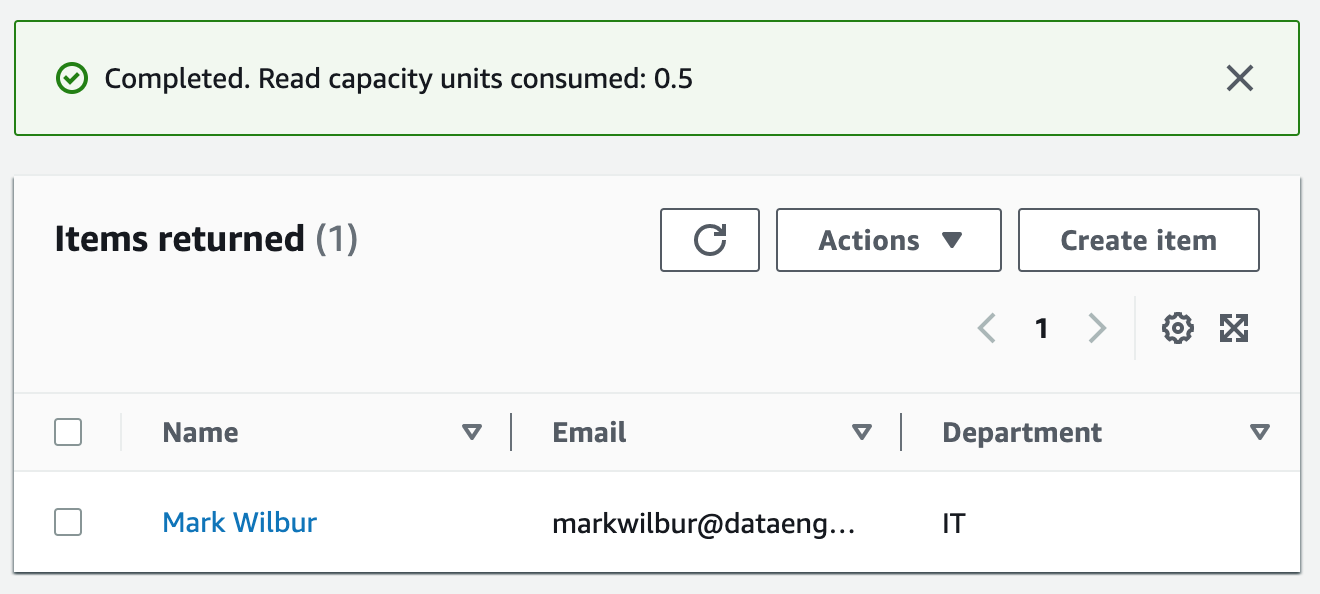